In this NB we would understand the need of regularization, apply it over the `toy-diabetes dataset` from `sklearn.datasets`. 

We will code and exprience following regularizations :
1. Ridge
2. Lasso 
3. Elastic Net 

<hr />

**Note** : implemention in Python using the scikit learn library.

<hr />

key pointers about Linear Regression ML Modelling :
--

> Linear Regression problems fall under supervised learning.

> Dependent variable(y), at least to some extent, is  a linear function of the independent variables(X1 to Xn). That is, we can estimate y using the mathematical expression:

**y = b0 + b1X1 + b2X2 + ... bnXn** 

*where , bi is the coefficient to be estimated by the model.*

> The cost function that we seek to minimize is the sum of squared errors(also referred to as residuals). This methodology is called the **ordinary least squares(OLS)** approach.

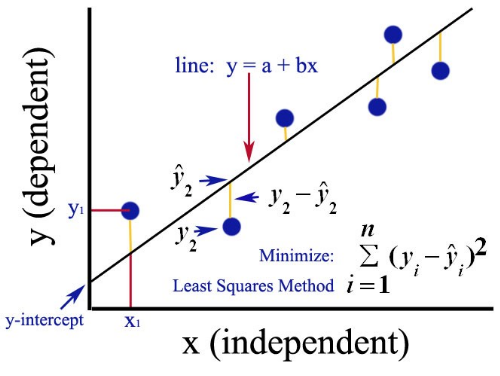

> Although the OLS approach works well in most cases, it has its own drawbacks when the data has **outliers** or when the **predictor variables ( Xi ) are correlated with each other**.

> This can have a significant impact on the overall prediction accuracy of the model, especially for out of sample or new data. In such cases, some form of regularization is helpful. Two of the most popular regularization techniques are Ridge regression and Lasso regression.

In [19]:
## creating a simple Linear regression model over the diabetes dataset
## by default Linear regression model is also called OLS model
## OLS --> Ordinary least Squares Model

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## loading the Toy diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

## https://scikit-learn.org/stable/datasets/index.html#toy-datasets

## data pre-processing. to convert ndarray to df
df = pd.DataFrame(diabetes.data)

df.columns = diabetes.feature_names

# Creating a new column containing response variable 'y' 
## (a quantitative measure of disease progression one year after baseline)
df['diabetes_measure'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Creating the feature matrix X
X = df.iloc[ : , : -1]
# Creating the response vector y
y = df.iloc[ : ,-1]


##--------------------------------
## creating a single Var OLS model 
##--------------------------------

# Choosing 'bmi' as the only feature from the feature matrix X 
## and reshaping the array to 2 dimensions
bmi = X.iloc[ : , 2]  ## [10, 20,]
bmi = bmi[ : , np.newaxis] 
## [ [10]
##   [20]  ]

# Choosing 'diabetes_measure' as the response variable and reshaping the array to 2 dimensions
y = df.iloc[ : ,-1]
y = y[ : ,np.newaxis]

## why use np.newaxis ?
## https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it


from sklearn.linear_model import LinearRegression

# Fitting the simple_lr object to the data --> this is a single Var LR model
simple_lr = LinearRegression().fit(bmi,y)

# predicting the response values and saving them in an object called predicted_y
predicted_y = simple_lr.predict(bmi)

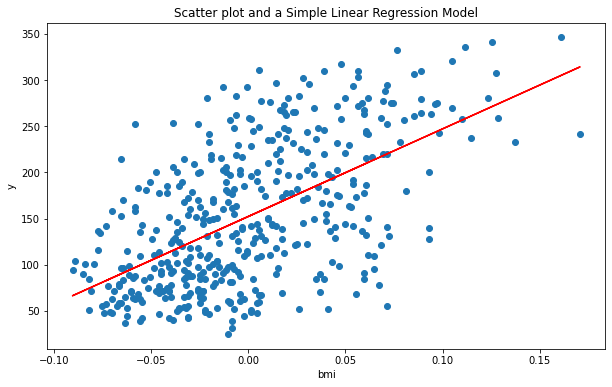

In [21]:
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, y)

plt.plot(bmi, predicted_y, c='r')

plt.title('Scatter plot and a Simple Linear Regression Model')

plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

> **Note 1:** We have not split the data into train-test set, as we have very limited data of only 442 records. Hence using entire data for training as well for testing. We can do this by cross validation. 

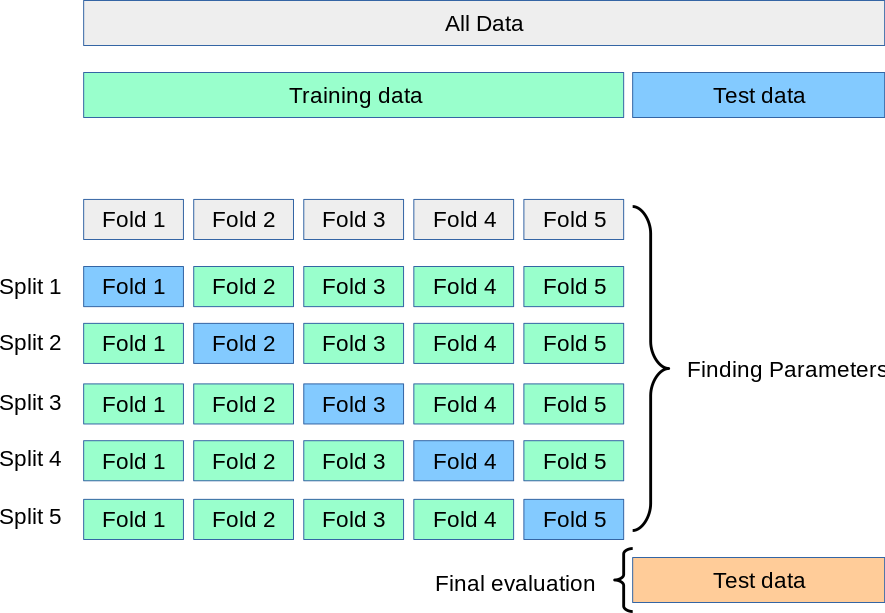

In [22]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score

## parameters to cross_val_score method  : 
## estimator(model) object, a feature matrix, a response vector, 
## a scoring mechanism ('neg_mean_squared_error' in our case) and cv 

# storing the ten scores in an object called mse
mse = cross_val_score(simple_lr, bmi, y, scoring='neg_mean_squared_error', cv=10)

print(mse)

# taking the mean of mse for using as an indicator of how good the model is
print(mse.mean())

## for mse  --> ideal value would be 0.

[-3887.88568862 -3723.13170703 -4213.18191102 -3909.35846549
 -3896.1811731  -3774.68344227 -4571.55641957 -2833.03811406
 -5037.63956214 -3222.53341777]
-3906.91899010684


So, we have an average score of **-3906.92 for 'neg_mean_squared_error'** for our simple linear regression model 'simple_lr'.

Let us check if adding more features improves model, producing an overall better average score. Next we check **`multiple linear regression`**.

In [23]:
# Fitting the multiple_lr object to the data , this time using the whole feature matrix X
multiple_lr = LinearRegression().fit(X,y)

# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score

# storing the ten scores in an object called mse
mse = cross_val_score(multiple_lr, X, y, scoring='neg_mean_squared_error', cv=10)

print(mse)

# taking the mean of mse for using as an indicator of how good the model is
print(mse.mean())

[-2533.84810936 -2870.76771141 -3512.7235093  -2759.22712936
 -3555.67794309 -2900.38041212 -3696.28187783 -2282.27959795
 -4122.9399814  -1769.68405657]
-3000.3810328390514


<font color='green'> <b>Wow </b></font> : the average 'neg_mean_squared_error' improved from -3906.92 to about -3000.38, which is a considerable improvement. Ideal value would be 0.

In [24]:
# Saving an array containing all the ten coefficients
multiple_lr_coeffs = multiple_lr.coef_[0]

multiple_lr_coeffs

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

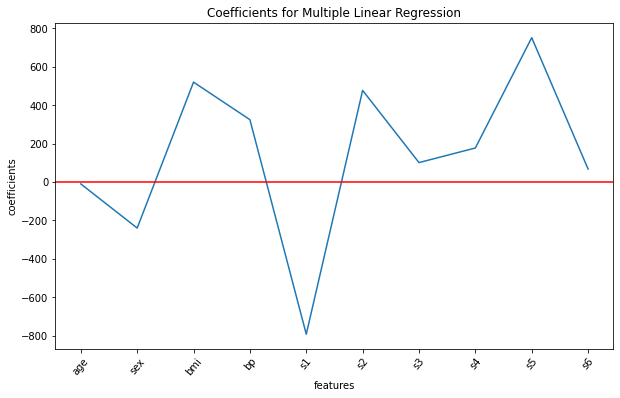

In [25]:
## Note that none of the estimated coefficient values are 0

# fetching feature names from the dataframe df
feature_names = df.drop('diabetes_measure',axis=1).columns

# Using matplotlib commands to plot
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)

plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

> We see that in this model, the **features bmi, s1, s2 and s5** are having a considerable impact on the progression of diabetes, as all of them have **high estimated coefficient values**.

Why Regularize?
--

One of the basic assumptions in multiple linear regression model is that there **should be no (or very less) multicollinearity** among the feature variables. This essentially means that the feature variables should ideally have no or very less correlation with each other.

A high correlation between the two feature variables gives rise to several problems. If we include one of them in the model, adding the other will have little or no impact on improving the model, but will only make the model more complex.

In [26]:
## The correlations among all the feature variables can be visualized 
## with the help of a correlation matrix :

X.corr().style.background_gradient(cmap='coolwarm')

## darker shades of red implying high positive correlation and 
## darker shades of blue implying high negative correlations.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In the multiple linear models we built in the previous section, both features `s1 and s2 came out as important features`. However, we can see that they have a `very high positive correlation of about 0.896`. This is clearly inducing multicollinearity into the model.

To counter such issues, we can use regularization techniques which allow us to lower this variance of the model at the cost of adding some bias into it, such that the total error is reduced. Lower variance implies that the problem of overfitting is tackled automatically, as the model generalizes well to unseen data after regularization.

The **`regularization techniques work by adding penalty factors to the original OLS cost function`** such that high coefficient values are penalized, taking them closer to zero.

The features with significant coefficient values are identified after a regularization procedure and other insignificant features with near-zero coefficient values can be dropped. This also leads to what is called natural features selection.

What is Ridge Regression?
--

Ridge regression (often referred to as L2 regularization) is a regularization technique in which the aim is to find those optimal coefficient estimates that minimize the following cost function:

> OLS cost function + Penalty for high coefficient estimates
 
 ![Ridge Equation](https://drive.google.com/uc?id=18g4AJD-9ZczNWoY7Unmc9TLrD3O8mcLZ 'Ridge Equation')

> Penalty factor is called as alpha or lambda 

*alpha is the hyperparameter representing regularization strength. A high value of alpha imposes a high penalty on the sum of squares of coefficient estimates. The value of alpha can be any positive real number value. When alpha is 0, it is same as performing a multiple linear regression, as the cost function is reduced to the OLS cost function.*

<hr /> 

In [27]:
## Ridge Regression in scikit learn
## As alpha is a hyperparameter, its optimal value 
## (that maximizes average neg_mean_squared_error for the model) 
## can be found using the GridSearchCV

# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge

# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001,0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
gscv = GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',gscv.fit(X,y).best_params_)

# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the Ridge estimator is:',gscv.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.04}
The best score for the Ridge estimator is: -2997.186793719345


**Note 2 :** So, their is minor improvement from  `-3000.38` (for MV OLS) to `-2997.18` ( for Ridge Regression)

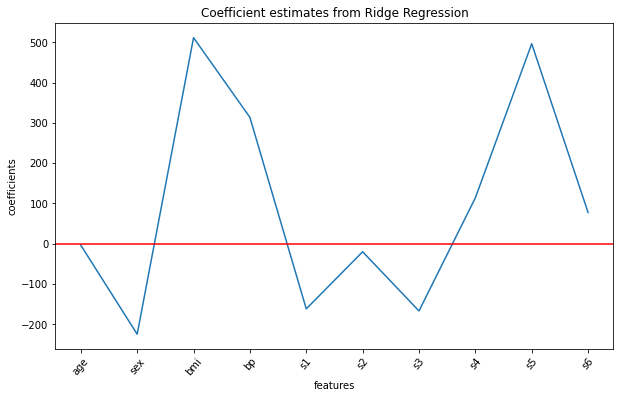

In [28]:
## visualize all the ten coefficient estimates for the ridge regression model

# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=0.04)

# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X,y).coef_

# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_ridge_coeffs[0])

plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

**`Visual Ananlysis`** :  Previously, features s1 and s2 came out as an important feature in the multiple linear regression, however, their coefficient values are significantly reduced after ridge regularization. 

The features `bmi` and `s5` still remain important.

In [29]:
best_ridge_coeffs

array([[  -3.60964996, -224.32948213,  511.20371879,  313.55271527,
        -161.53387594,  -19.89297365, -166.67979782,  113.95024636,
         496.22227036,   77.44390618]])

What is Lasso Regression?
--

Lasso regularization (called L1 regularization) is also a regularization technique which works on similar principles as the ridge regularization, but with one important difference. The penalty factor in Lasso regularization is composed of the sum of absolute values of coefficient estimates instead of the sum of squares.

Thus, the aim in Lasso regression is to find those optimal coefficient estimates that minimize the following cost function :

![Lasso Equation](https://drive.google.com/uc?id=1DSku2TVwSu67zHnEdc_XCe1QxRQHZGq9 'Lasso Equation')

Note that in the case of Lasso, the penalty is made up of the sum of absolute values (i.e. magnitudes) of coefficients, *unlike in Ridge regression (where it was made up of the sum of squares instead).*

Here, alpha is still the hyperparameter representing regularization strength. A high value of alpha imposes a high penalty on the sum of magnitudes of coefficient estimates. The value of alpha can be any positive real number value as before.

In [30]:
## getting the optimal value of alpha in case of Lasso regression 
## using the GridSearchCV algorithm:

# importing the Lasso class from linear_model 
from sklearn.linear_model import Lasso

# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso = GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:', lasso.fit(X,y).best_params_)

# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Lasso estimator is:', lasso.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.06}
The best score for the best Lasso estimator is: -2987.4180821246437


**Note 3 :** So, their is minor improvement from  `-3000.38` (for MV OLS) to `-2987.41` ( for Lasso Regression)

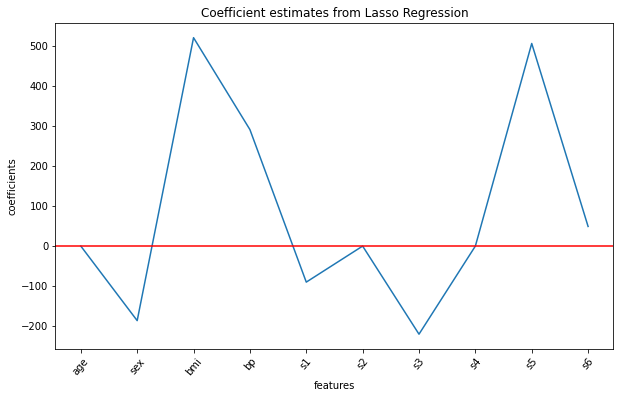

In [31]:
## visualize all the ten coefficient estimates for the Lasso regression model 

# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha=0.06)

# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X,y).coef_

# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)

plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [32]:
## print the lasso coefficients
best_lasso_coeffs

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

**Note 4:** : Lasso regularization completely eliminates features 'age', s2 and s4 from the model (as their estimated coefficients are 0) and gives us a simpler model with less variables and overall best score.

What is Elastic Net Regression?
--

Elastic Net regularization combines the power of Lasso and Ridge regularizations into one single technique. The cost function to be minimized for Elastic Net is :

![Elastic net Equation](https://drive.google.com/uc?id=1BMMdLtkbqZFVUqzzSnye-Hgc4Hnk3pAa 'Elastic net Equation')

The above cost function has two important hyperparameters: alpha and l1_ratio. Alpha in case of Elastic Net regularization is a constant that is multiplied with both L1(Lasso) and L2(Ridge) penalty terms. The hyperparameter l1_ratio is called the mixing parameter such that 0 <= l1_ratio <= 1.

> When `l1_ratio is 1`, it means that the share of L1 (Lasso) is 100% and that of L2 (Ridge) is 0%, i.e. same as a Lasso regularization. Similarly, when `l1_ratio is 0`, it is same as a Ridge regularization.


<hr />

The optimal values for both alpha and l1_ratio can be determined using GridSearchCV.

In [33]:
from sklearn.linear_model import ElasticNet

alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.95,0.99,1]}

elastic = GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10)

In [34]:
## Let us now take a peek at the best values for hyperparameters alpha 
## and l1_ratio (and the best score from Elastic Net regularization):
import warnings
warnings.filterwarnings('ignore')

elastic.fit(X,y).best_params_

{'alpha': 0.06, 'l1_ratio': 1}

In [35]:
# Printing the average neg_mean_squared_error of a 10-fold cross validation
import warnings
warnings.filterwarnings('ignore')

elastic.fit(X,y).best_score_

-2987.4180821246437

**Note 5 :** Well, their is no improvement from  `-2987.41` (for Lasso) to `-2987.41` ( for Elastic net Regression). This is because `'l1_ratio': 1` indicates that its 100% lasso.

In [37]:
# Creating an object containing the best Lasso regression model
best_elastic_model = ElasticNet(alpha=0.06, l1_ratio=1)

# Extracting the coefficient estimates for all ten features
best_elastic_coeffs = best_elastic_model.fit(X,y).coef_

best_elastic_coeffs

##-------------------------------------------------
## Note the coefficients are same as we got in lasso

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

`(last thing)`

Compare the coefficient estimates obtained from:
--

> Multiple linear regression without any regularization

> Ridge regularization

> Lasso regularization

In [38]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs,
 'Elastic': best_elastic_coeffs},
 index=feature_names)

# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
 color = 'red' if value == 0 else 'black'
 return 'color: %s' % color

comparing_models= comparing_models.style.applymap(color_red_for_zero)

comparing_models

,without_regularization,Ridge,Lasso,Elastic
age,-10.012198,-3.609650,-0.000000,-0.000000
sex,-239.819089,-224.329482,-186.309245,-186.309245
bmi,519.839787,511.203719,520.894116,520.894116
bp,324.390428,313.552715,291.196041,291.196041
s1,-792.184162,-161.533876,-90.068555,-90.068555
s2,476.745838,-19.892974,-0.000000,-0.000000
s3,101.044570,-166.679798,-220.207264,-220.207264
s4,177.064176,113.950246,0.000000,0.000000
s5,751.279321,496.222270,506.422212,506.422212
s6,67.625386,77.443906,49.074614,49.074614


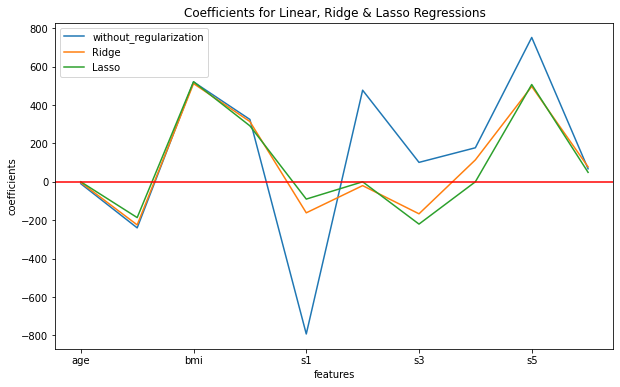

In [39]:
## plotting is optional 
## we may plot for visual analysis of the parameters

## creating a new dataframe without elastic net regularization
comparing_models_new = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs},
 index=feature_names)

comparing_models_new.plot(figsize=(10, 6))

plt.axhline(0, color='r', linestyle='solid')

plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

Conclusion :
--

> Although Ridge regularization shrinks the values of coefficient estimates considerably by pulling them closer to zero, it does not make them exactly zero.

> On the other hand, Lasso regularization completely eliminates features ('age', 's2' and 's4' in our example) from the model by assigning their coefficients zero values. This results in a much more parsimonious/more simple model.

> As a default rule Lasso is the best when we have very large number of features and/or some features with very high coefficient values.

> As a default rule Ridge is the best when we have moderate number of features and some features with higher coefficient values.